# Modeling Motion Detection Using the Reichardt-Hassenstein Detector (+ Averaging)

Start with a signal e.g. a moving stripe.

In [198]:
import matplotlib.pyplot as plt  
import numpy as np

v0 = 1
wavelength0 = 5
dx = 1
dt = 1

def f(x,t,v,wavelength):
    arr = (1.0 + np.sin(2*np.pi*(x-v*t)/(wavelength)))/2
    arr[t < 0] = 0
    arr[t > 5] = 0
    if (np.all(t < 0) or np.all(t > 5)):
            return 0
    else:
        return arr

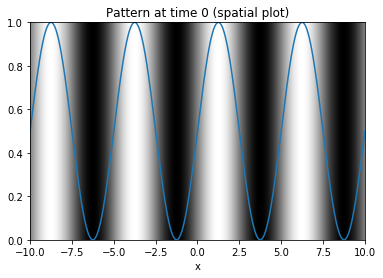

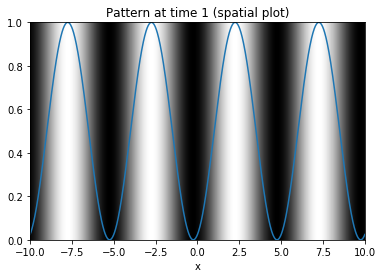

In [199]:
x = np.linspace(-10,10,1000)

y = f(x,0,1,wavelength0)
yarr = np.vstack((y,))
plt.imshow(yarr, extent=(min(x),max(x), 0,1), aspect='auto', cmap='gray')
plt.plot(x, y)  
plt.xlim([-10, 10])
plt.ylim([0, 1])  
plt.title('Pattern at time 0 (spatial plot)')
plt.xlabel('x')
plt.show() 

y = f(x,1,1,wavelength0)
yarr = np.vstack((y,))
plt.imshow(yarr, extent=(min(x),max(x), 0,1), aspect='auto', cmap='gray')
plt.plot(x, y)  
plt.xlim([-10, 10])
plt.ylim([0, 1])  
plt.title('Pattern at time 1 (spatial plot)')
plt.xlabel('x')
plt.show() 

A detector at $x_1 = 0$ will see a wave of the form 
$y_1(0,t) = y_1(t)$

A detector at $x_2 = \Delta x$ will see a wave of the form 
$y_2(\Delta x, t) = y_2(t)$

In [200]:
def y1(x,t,v,wavelength):
    return f(x,t,v,wavelength)

def y2(x,t,v,wavelength):
    return f(x+dx,t,v,wavelength)

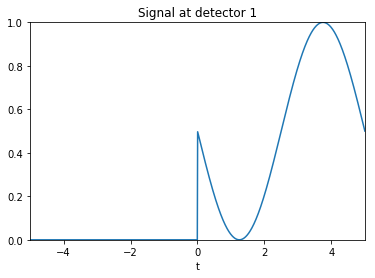

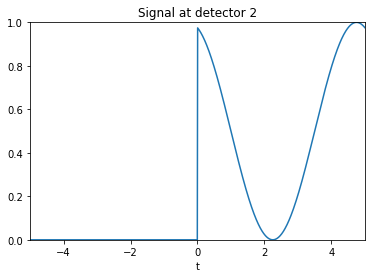

In [201]:
t = np.linspace(-5,5,1000)

y = y1(0,t,v0,wavelength0)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 1')
plt.xlabel('t')
plt.show()

y = y2(0,t,v0,wavelength0)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 2')
plt.xlabel('t')
plt.show() 

The left channel of the RH detector computes $y_1(t-\Delta t) \cdot y_2(t)$

The right channel of the RH detector computes $y_1(t) \cdot y_2(t-\Delta t)$

The RH detector computes the difference of the left and right channels
$y_1(t-\Delta t) \cdot y_2(t) - y_1(t) \cdot y_2(t-\Delta t)$

In [202]:
def left(x, t, v, sigma):
    return y1(x, t-dt,v,sigma) * y2(x, t,v,sigma)

def right(x, t, v, sigma):
    return y1(x, t,v,sigma) * y2(x, t-dt,v,sigma)


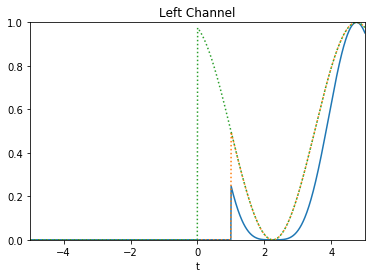

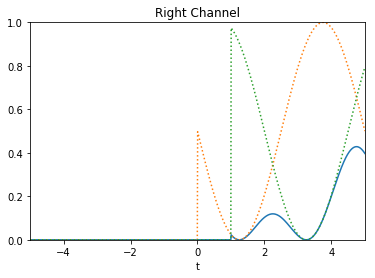

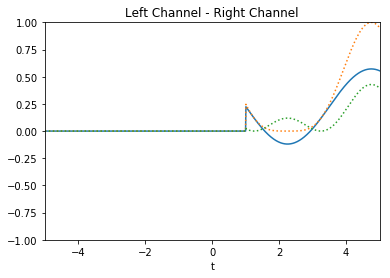

In [203]:
t = np.linspace(-5,5,1000)

plt.plot(t, left(0, t, v0, wavelength0))  
plt.plot(t, y1(0, t-dt, v0, wavelength0), linestyle=':')
plt.plot(t, y2(0, t, v0, wavelength0), linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([0, 1])
plt.xlabel('t')
plt.title('Left Channel')  
plt.show() 


plt.plot(t, right(0, t, v0, wavelength0))  
plt.plot(t, y1(0, t, v0, wavelength0), linestyle=':')  
plt.plot(t, y2(0, t-dt, v0, wavelength0), linestyle=':')
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.xlabel('t')
plt.title('Right Channel')  
plt.show()

plt.plot(t, left(0, t, v0, wavelength0) - right(0, t, v0, wavelength0))
plt.plot(t, left(0, t, v0, wavelength0), linestyle=':')
plt.plot(t, right(0, t, v0, wavelength0), linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([-1, 1])  
plt.xlabel('t')
plt.title('Left Channel - Right Channel')  
plt.show() 

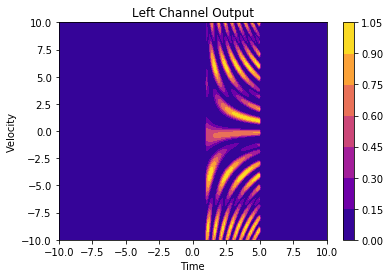

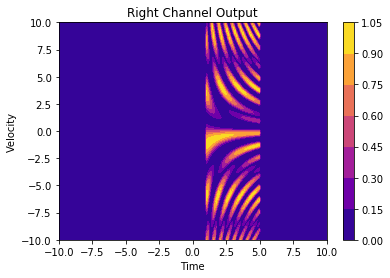

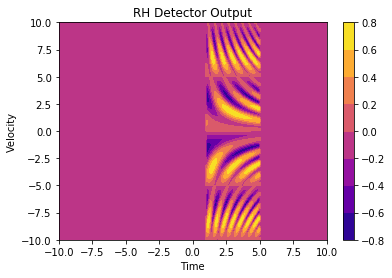

In [204]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
  
t = np.linspace(-10, 10, 200)
v = np.linspace(-10, 10, 200) 
#sigma = np.linspace(0.1, 5, 100) 

fig, ax = plt.subplots(1, 1) 
output_left = [left(0, t, v0, wavelength0) for v0 in v]
plt.contourf(t, v, output_left, cmap='plasma') 
ax.set_title('Left Channel Output') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output_right = [right(0, t, v0, wavelength0) for v0 in v]
plt.contourf(t, v, output_right, cmap='plasma') 
ax.set_title('Right Channel Output') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output = np.subtract(output_left,output_right)
plt.contourf(t, v, output, cmap='plasma') 
ax.set_title('RH Detector Output') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
  
plt.show()

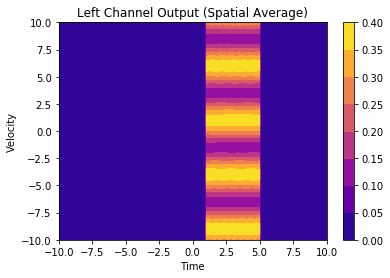

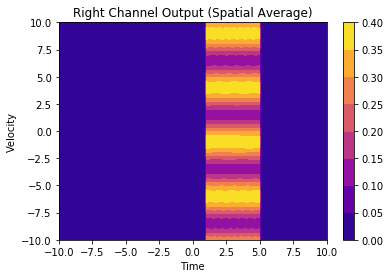

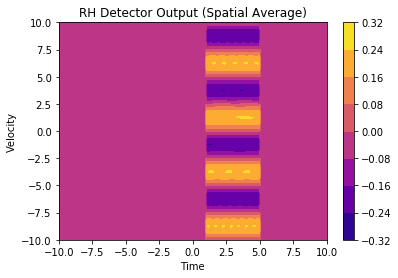

In [205]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
  
x = np.linspace(0, 10, 100)
t = np.linspace(-10, 10, 200)
v = np.linspace(-10, 10, 200) 
#sigma = np.linspace(0.1, 5, 100) 

fig, ax = plt.subplots(1, 1) 
output_left = [[np.average(left(x, t0, v0, wavelength0)) for t0 in t] for v0 in v]
plt.contourf(t, v, output_left, cmap='plasma') 
ax.set_title('Left Channel Output (Spatial Average)') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output_right = [[np.average(right(x, t0, v0, wavelength0)) for t0 in t] for v0 in v]
plt.contourf(t, v, output_right, cmap='plasma') 
ax.set_title('Right Channel Output (Spatial Average)') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output = np.subtract(output_left,output_right)
plt.contourf(t, v, output, cmap='plasma') 
ax.set_title('RH Detector Output (Spatial Average)') 
ax.set_xlabel('Time') 
ax.set_ylabel('Velocity') 
plt.colorbar()
  
plt.show()

/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sin
  # Remove the CWD from sys.path while we load stuff.


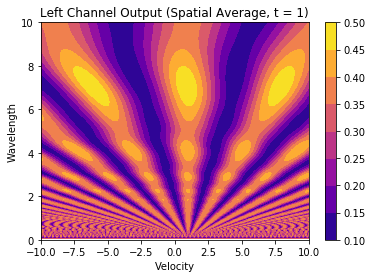

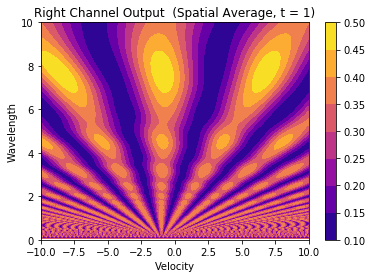

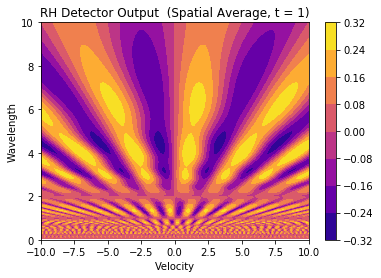

In [206]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
  
x = np.linspace(0, 10, 100)
t0 = 1
v = np.linspace(-10, 10, 200)
wavelength = np.linspace(0, 10, 200) 

fig, ax = plt.subplots(1, 1) 
output_left = [[np.average(left(x, t0, v0, wavelength0)) for v0 in v] for wavelength0 in wavelength]
plt.contourf(v, wavelength, output_left, cmap='plasma') 
ax.set_title('Left Channel Output (Spatial Average, t = 1)') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 
plt.colorbar()
plt.show() 

fig, ax = plt.subplots(1, 1) 
output_right = [[np.average(right(x, t0, v0, wavelength0)) for v0 in v] for wavelength0 in wavelength]
plt.contourf(v, wavelength, output_right, cmap='plasma') 
ax.set_title('Right Channel Output  (Spatial Average, t = 1)') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 
plt.colorbar()
plt.show()

fig, ax = plt.subplots(1, 1) 
output = np.subtract(output_left,output_right)
plt.contourf(v, wavelength, output, cmap='plasma') 
ax.set_title('RH Detector Output  (Spatial Average, t = 1)') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 
plt.colorbar()
plt.show()

/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/aatish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sin
  # Remove the CWD from sys.path while we load stuff.


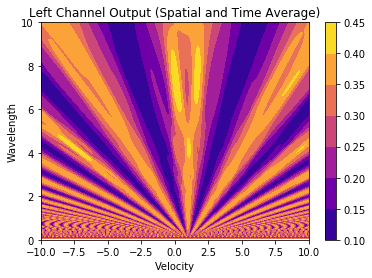

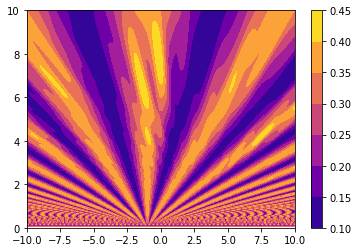

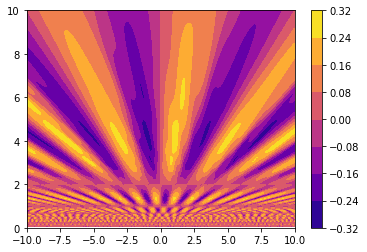

In [208]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
  

x = np.linspace(0, 10, 100)
t = np.linspace(0, 5, 10)
v = np.linspace(-10, 10, 200)
wavelength = np.linspace(0, 10, 200) 

fig, ax = plt.subplots(1, 1) 

alpha = 0.5

output_left = []
for wavelength0 in wavelength:
    arr = []
    for v0 in v:
        output = 0
        for t0 in t:
            output = alpha * output + (1 - alpha) * np.average(left(x, t0, v0, wavelength0))
        arr.append(output)
    output_left.append(arr)
        
plt.contourf(v, wavelength, output_left, cmap='plasma') 
ax.set_title('Left Channel Output (Spatial and Time Average)') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 
plt.colorbar()
plt.show() 

output_right = []
for wavelength0 in wavelength:
    arr = []
    for v0 in v:
        output = 0
        for t0 in t:
            output = alpha * output + (1 - alpha) * np.average(right(x, t0, v0, wavelength0))
        arr.append(output)
    output_right.append(arr)
        
plt.contourf(v, wavelength, output_right, cmap='plasma') 
ax.set_title('Right Channel Output (Spatial and Time Average)') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 
plt.colorbar()
plt.show() 

output = np.subtract(output_left,output_right)
plt.contourf(v, wavelength, output, cmap='plasma') 
ax.set_title('RH Detector Output (Spatial and Time Average)') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Wavelength') 
plt.colorbar()
plt.show() 


